# Exploratory Data Analysis - Sound Classification Dataset

This notebook performs a comprehensive analysis of the sound classification dataset, exploring various mechanical issue categories and their audio characteristics.

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import os
from scipy.stats import describe
from IPython.display import Audio
# plt.style.use('seaborn')
%matplotlib inline

## 1. Data Overview
Let's first examine the structure of our dataset and the number of samples in each category.

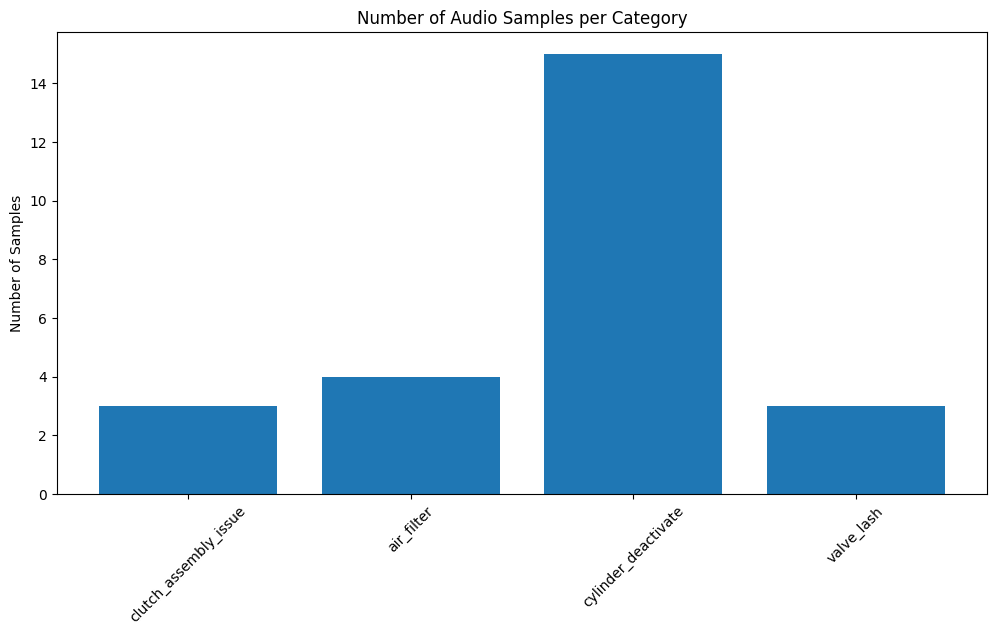


Dataset Summary:
Total number of categories: 4
Total number of samples: 25


In [5]:
# Set data directory path
DATA_DIR = '../data'

# Get categories and file counts
categories = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d)) and not d.startswith('.')]
file_counts = {}

for category in categories:
    path = os.path.join(DATA_DIR, category)
    files = [f for f in os.listdir(path) if f.endswith('.wav')]
    file_counts[category] = len(files)

# Create a bar plot of samples per category
plt.figure(figsize=(12, 6))
plt.bar(file_counts.keys(), file_counts.values())
plt.title('Number of Audio Samples per Category')
plt.xticks(rotation=45)
plt.ylabel('Number of Samples')
plt.show()

# Display summary statistics
print('\nDataset Summary:')
print(f'Total number of categories: {len(categories)}')
print(f'Total number of samples: {sum(file_counts.values())}')

## 2. Audio Signal Analysis
Let's analyze the audio characteristics of each category by examining:
- Waveform plots
- Spectrograms
- Mel-spectrograms
- Basic audio features

In [6]:
def analyze_audio(file_path, title):
    # Load the audio file
    y, sr = librosa.load(file_path)
    
    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    fig.suptitle(f'Audio Analysis - {title}', size=16)
    
    # Plot waveform
    librosa.display.waveshow(y, sr=sr, ax=axes[0])
    axes[0].set_title('Waveform')
    
    # Plot spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear', x_axis='time', ax=axes[1])
    axes[1].set_title('Spectrogram')
    
    # Plot mel-spectrogram
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
    librosa.display.specshow(mel_spect_db, y_axis='mel', x_axis='time', ax=axes[2])
    axes[2].set_title('Mel-spectrogram')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and return audio features
    features = {
        'Duration (s)': len(y) / sr,
        'RMS Energy': np.sqrt(np.mean(y**2)),
        'Zero Crossing Rate': np.mean(librosa.feature.zero_crossing_rate(y)),
        'Spectral Centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'Spectral Rolloff': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    }
    
    return pd.Series(features)


Analyzing sample from category: clutch_assembly_issue


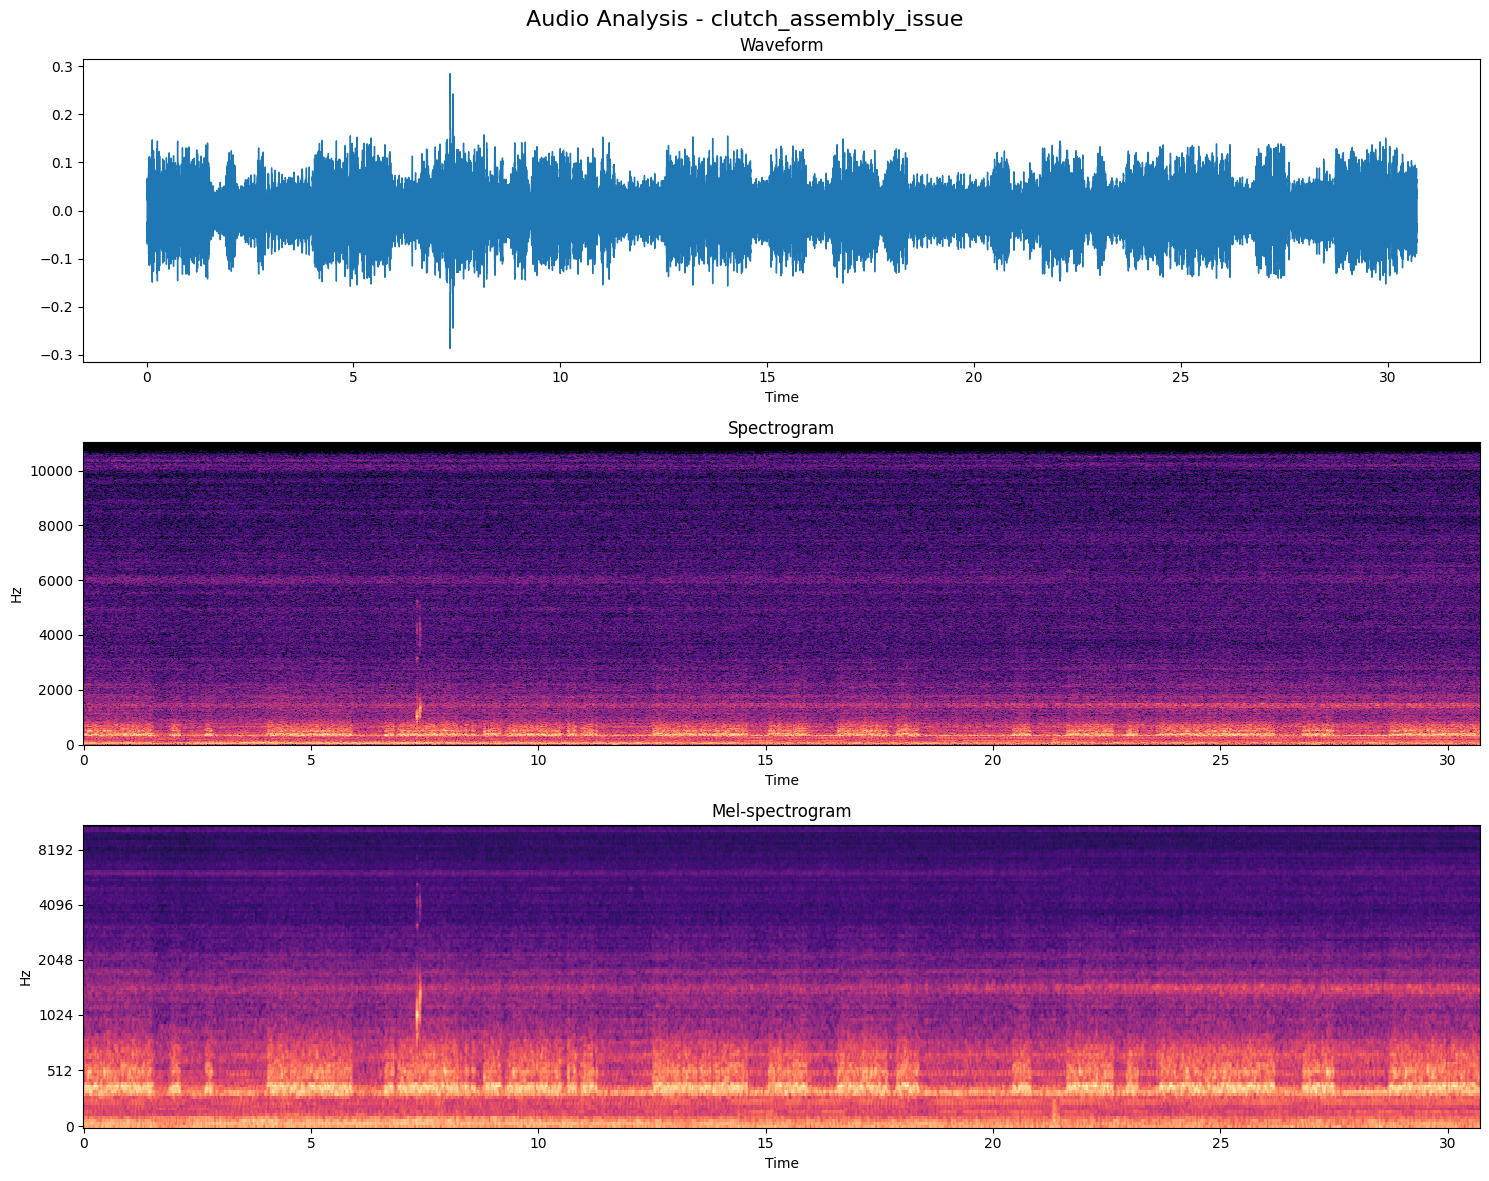


Analyzing sample from category: air_filter


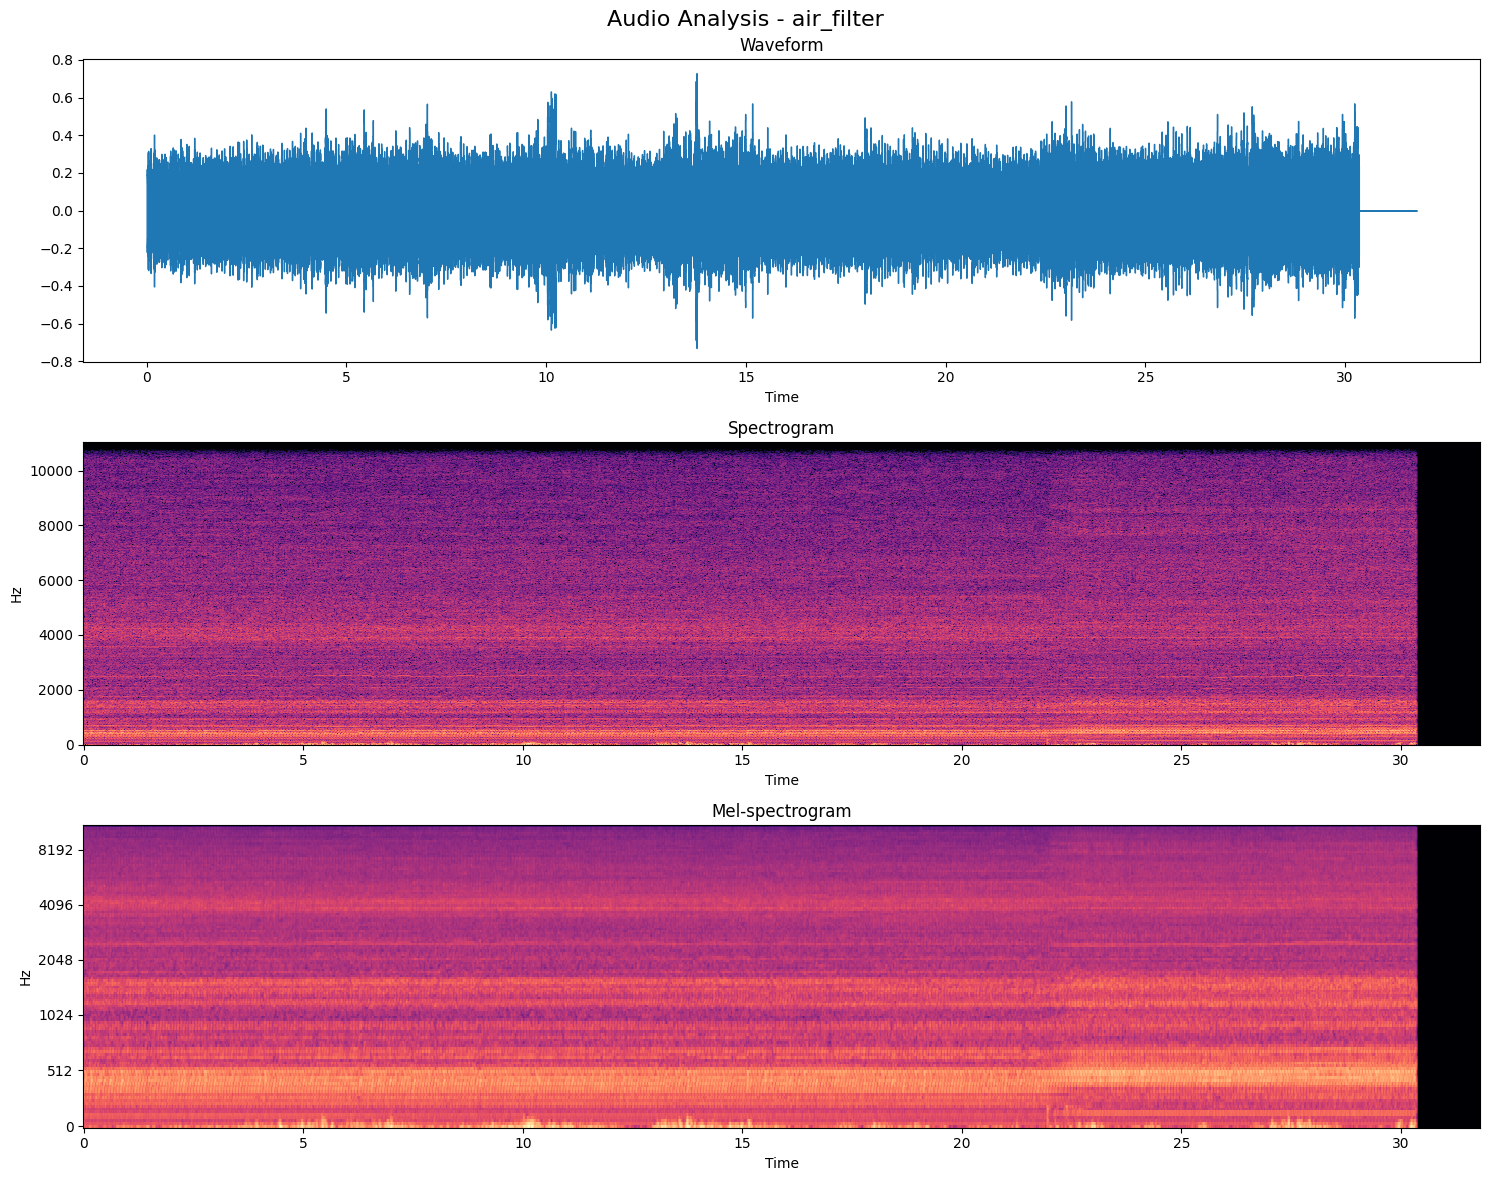


Analyzing sample from category: cylinder_deactivate


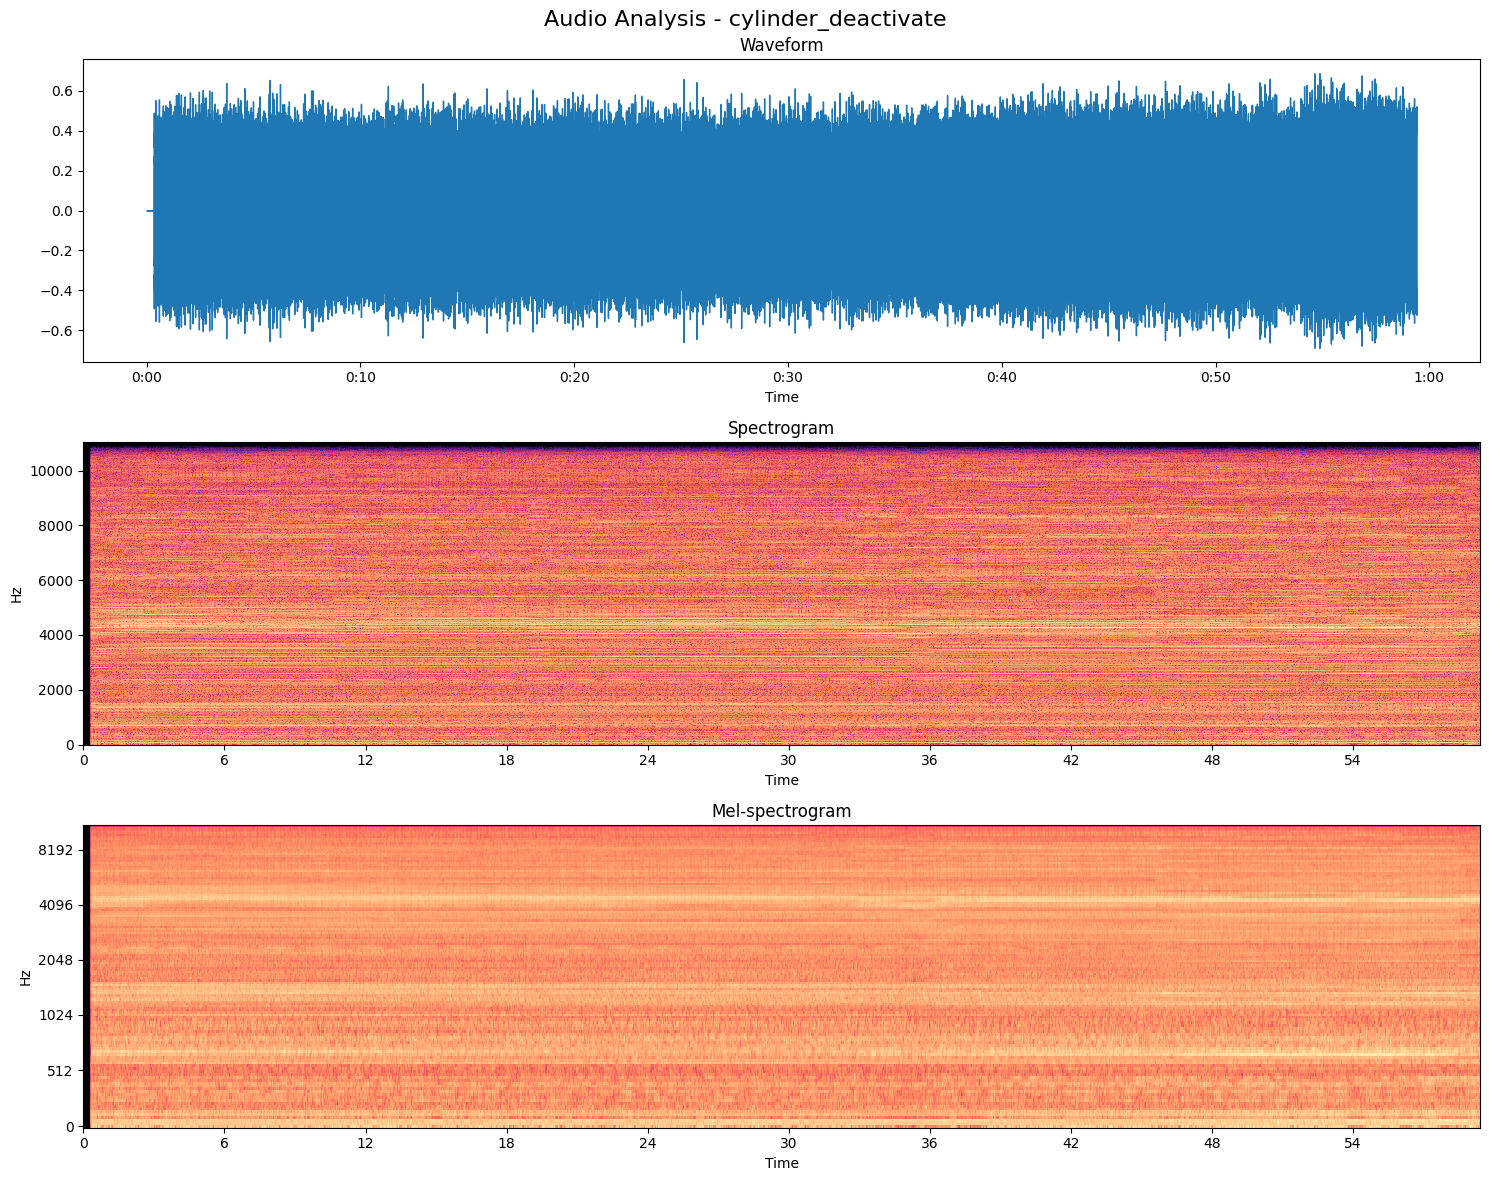


Analyzing sample from category: valve_lash


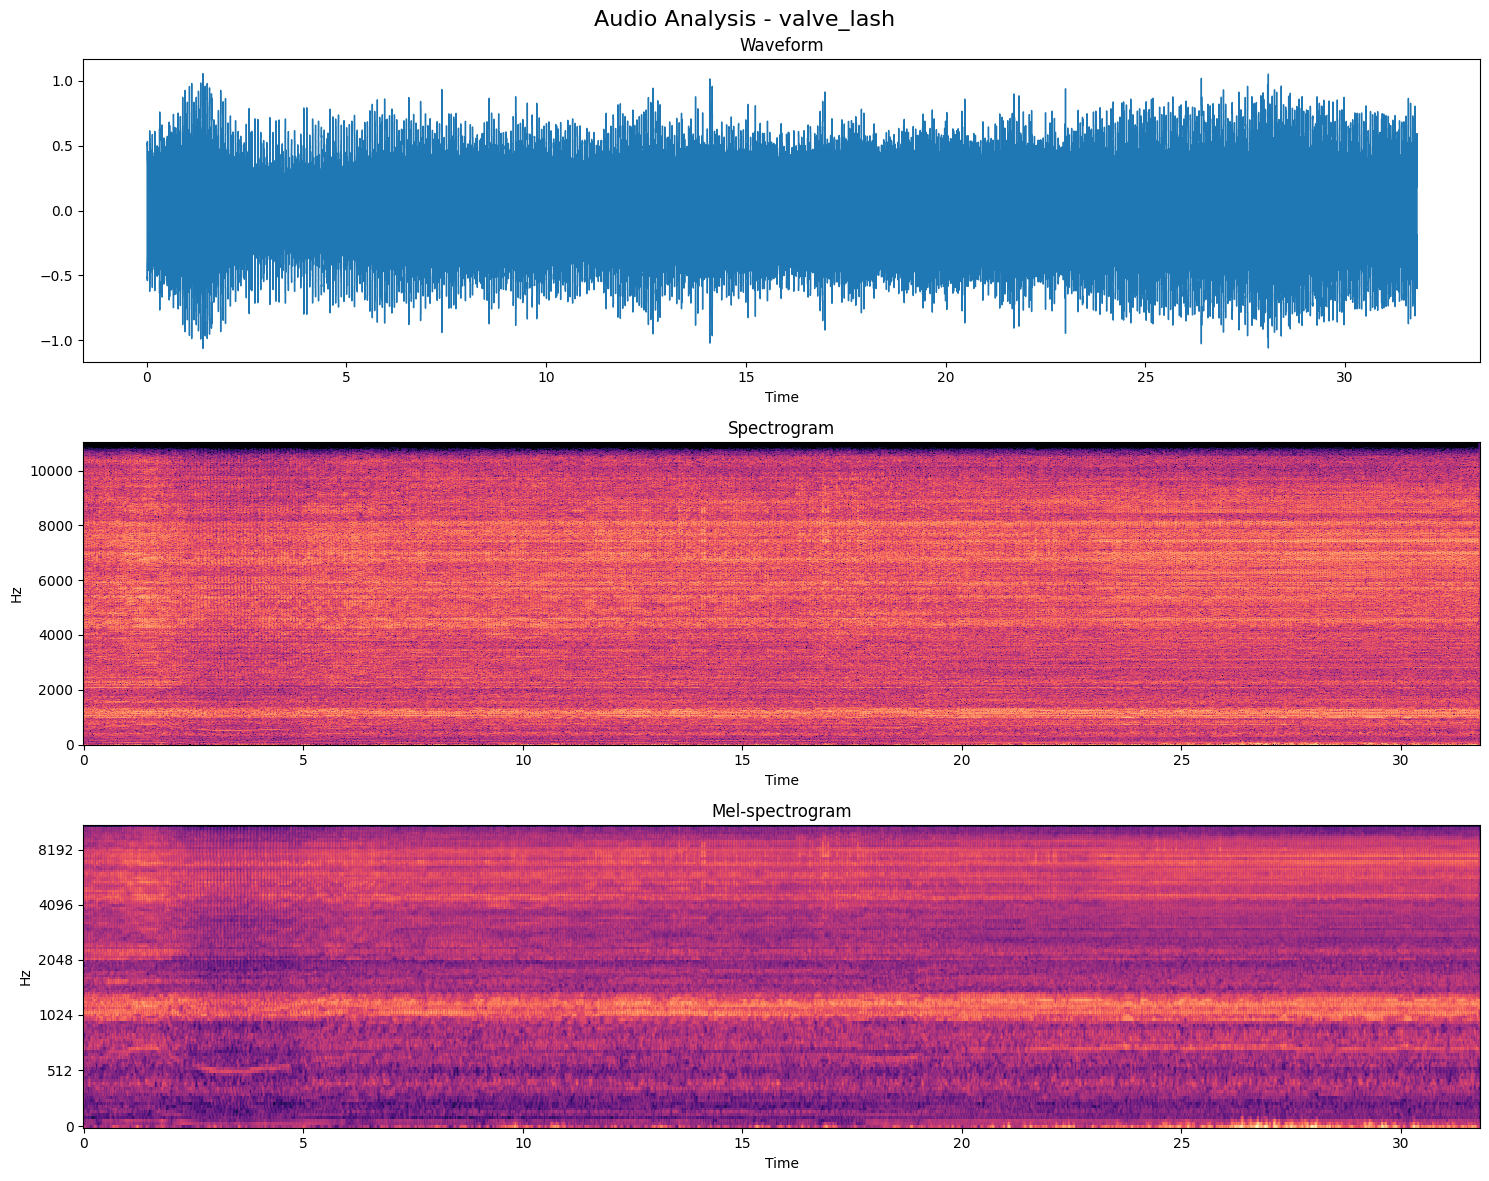


Feature Summary Statistics:


Duration (s)  RMS Energy  Zero Crossing Rate  \
Category                                                              
clutch_assembly_issue     30.700000    0.037060            0.037025   
air_filter                31.789977    0.108282            0.141179   
cylinder_deactivate       59.409478    0.130596            0.388175   
valve_lash                31.789977    0.149308            0.432360   

                       Spectral Centroid  Spectral Rolloff  
Category                                                    
clutch_assembly_issue        1180.348654       1943.847656  
air_filter                   2852.810105       6098.627502  
cylinder_deactivate          4652.868806       8124.252867  
valve_lash                   5302.269053       8246.375902

In [7]:
# Analyze one sample from each category
feature_data = []

for category in categories:
    path = os.path.join(DATA_DIR, category)
    files = [f for f in os.listdir(path) if f.endswith('.wav')]
    if files:
        sample_file = os.path.join(path, files[0])
        print(f'\nAnalyzing sample from category: {category}')
        features = analyze_audio(sample_file, category)
        features['Category'] = category
        feature_data.append(features)

# Create a DataFrame with all features
feature_df = pd.DataFrame(feature_data)
print('\nFeature Summary Statistics:')
display(feature_df.set_index('Category'))

## 3. Feature Distribution Analysis

/var/folders/0v/d6102c852xd7_n72x5vjvh2h0000gp/T/ipykernel_3192/1026437932.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/0v/d6102c852xd7_n72x5vjvh2h0000gp/T/ipykernel_3192/1026437932.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/0v/d6102c852xd7_n72x5vjvh2h0000gp/T/ipykernel_3192/1026437932.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/0v/d6102c852xd7_n72x5vjvh2h0000gp/T/ipykernel_3192/1026437932.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set

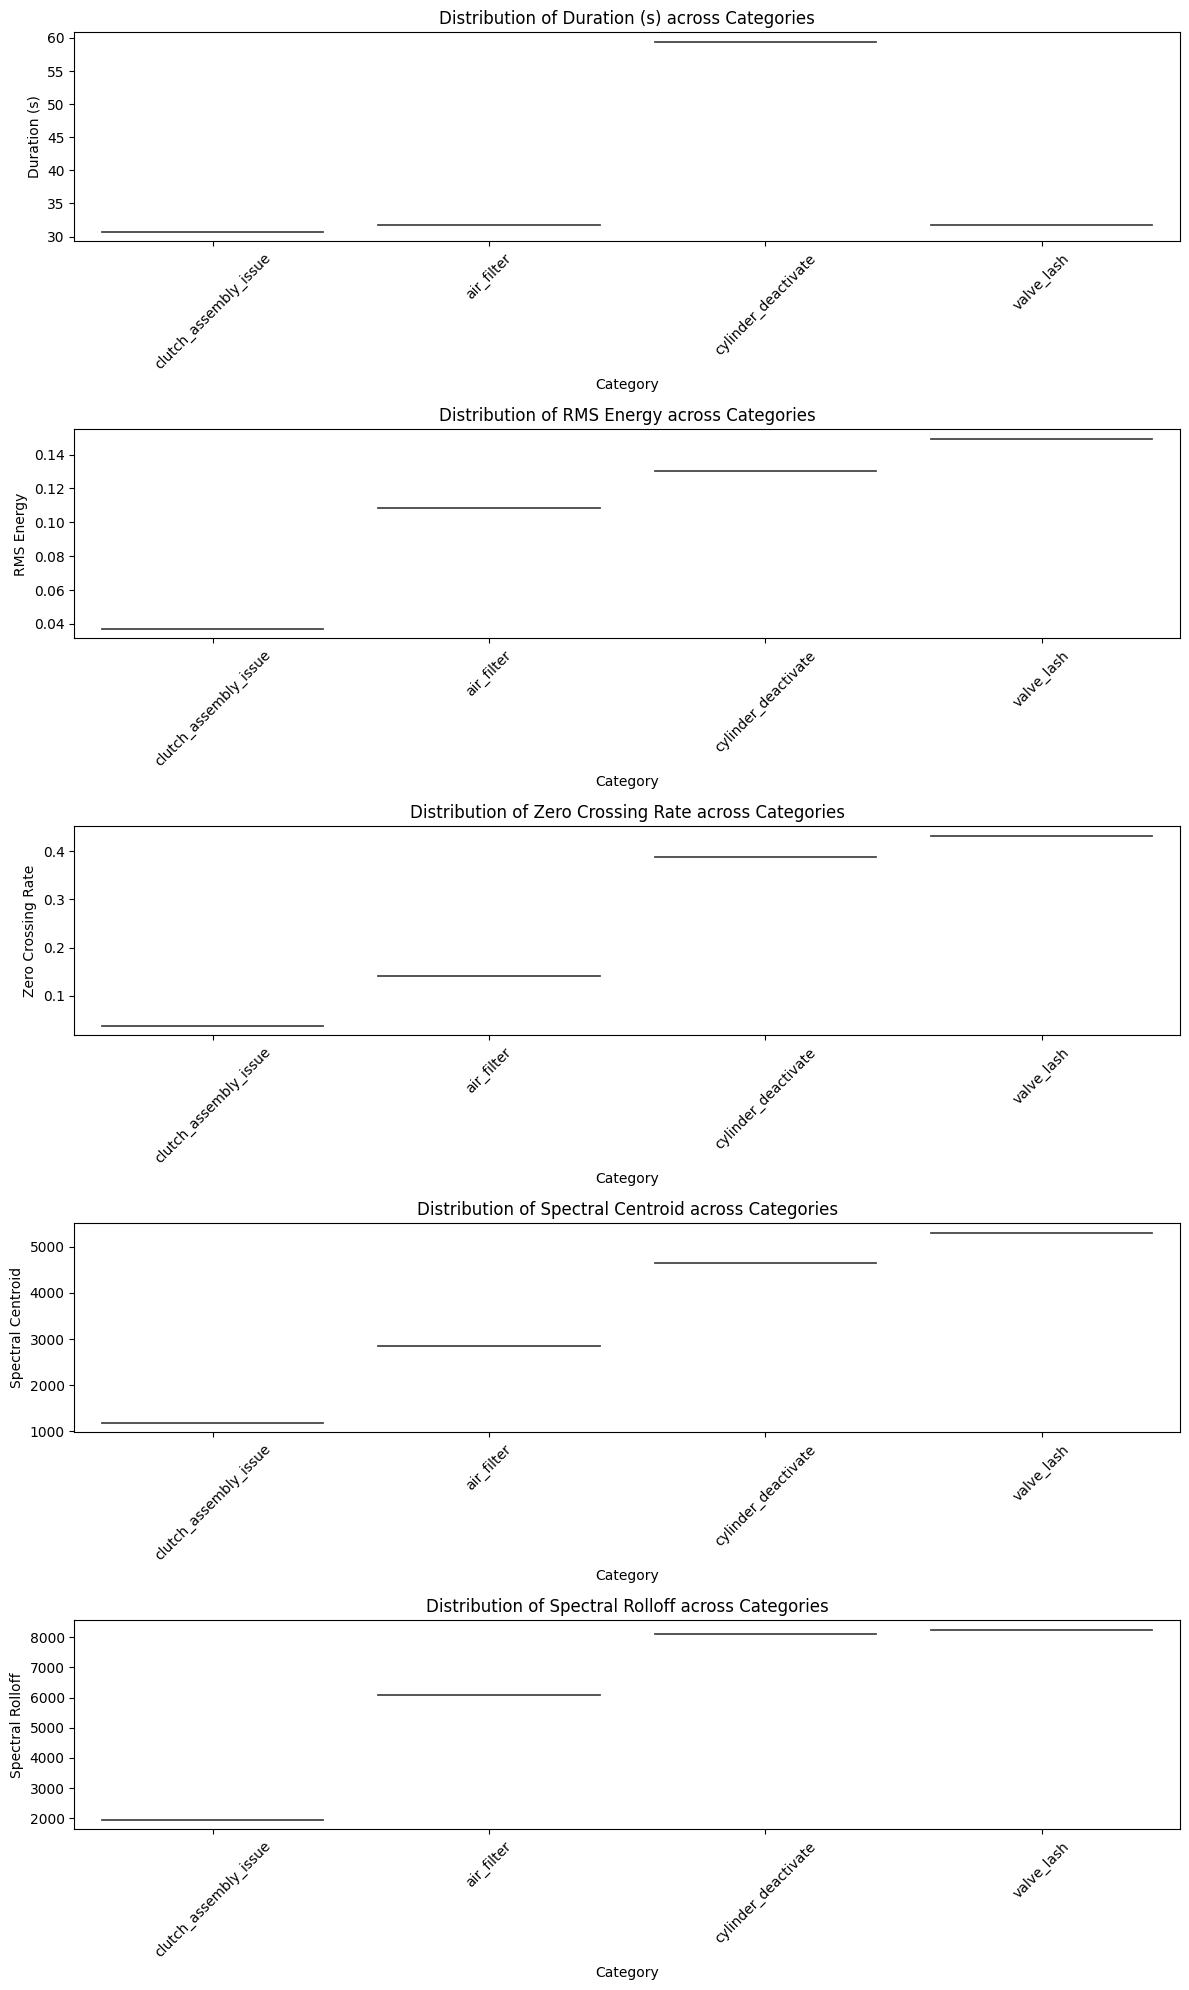

In [8]:
# Create violin plots for each feature
features_to_plot = [col for col in feature_df.columns if col != 'Category']

fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(12, 4*len(features_to_plot)))
for i, feature in enumerate(features_to_plot):
    sns.violinplot(data=feature_df, x='Category', y=feature, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_title(f'Distribution of {feature} across Categories')

plt.tight_layout()
plt.show()

## 4. Correlation Analysis

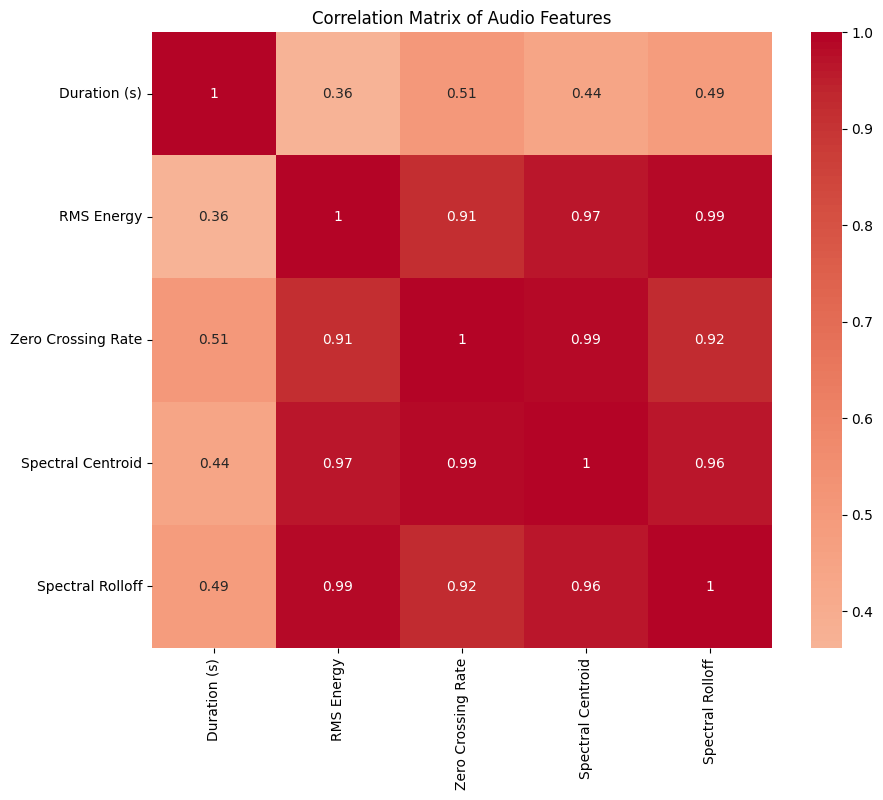

In [9]:
# Calculate correlation matrix for numerical features
correlation_matrix = feature_df.drop('Category', axis=1).corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Audio Features')
plt.show()

## 5. Key Findings and Insights

1. **Dataset Structure**:
   - Number of categories and distribution of samples
   - Total duration of audio data

2. **Audio Characteristics**:
   - Typical duration ranges
   - Energy levels across categories
   - Frequency characteristics (from spectrograms)

3. **Feature Analysis**:
   - Key differentiating features between categories
   - Correlation patterns
   - Potential features for classification

4. **Recommendations**:
   - Data preprocessing steps for modeling
   - Feature engineering suggestions
   - Potential challenges and solutions